In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data_csv = pd.read_csv("C:/Users/saura/Downloads/Jupyter/Index2018.xls")

df = raw_data_csv.copy()

df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [3]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [4]:
df.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

# Converting dates using to_datetime



In [5]:
df.date = pd.to_datetime(df.date, dayfirst = True)
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [6]:
df.set_index('date', inplace = True)
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


# Converting to daily frequency and filling the missing values using the last filled entries.

In [7]:
df = df.asfreq('d')
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [8]:
df = df.fillna(method = 'ffill')
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

# Splitting the stock indices into individual indicies

In [9]:
df['spx_price'] = df.spx
df.head()

,spx,dax,ftse,nikkei,spx_price
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,469.90
1994-01-08,469.90,2224.95,3445.98,18124.01,469.90
1994-01-09,469.90,2224.95,3445.98,18124.01,469.90
1994-01-10,475.27,2225.00,3440.58,18443.44,475.27
1994-01-11,474.13,2228.10,3413.77,18485.25,474.13


In [10]:
df['ftse_price'] = df.ftse
df.head()

,spx,dax,ftse,nikkei,spx_price,ftse_price
date,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,469.90,3445.98
1994-01-08,469.90,2224.95,3445.98,18124.01,469.90,3445.98
1994-01-09,469.90,2224.95,3445.98,18124.01,469.90,3445.98
1994-01-10,475.27,2225.00,3440.58,18443.44,475.27,3440.58
1994-01-11,474.13,2228.10,3413.77,18485.25,474.13,3413.77


In [11]:
df['dax_price'] = df.dax
df.head()

,spx,dax,ftse,nikkei,spx_price,ftse_price,dax_price
date,,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,469.90,3445.98,2224.95
1994-01-08,469.90,2224.95,3445.98,18124.01,469.90,3445.98,2224.95
1994-01-09,469.90,2224.95,3445.98,18124.01,469.90,3445.98,2224.95
1994-01-10,475.27,2225.00,3440.58,18443.44,475.27,3440.58,2225.00
1994-01-11,474.13,2228.10,3413.77,18485.25,474.13,3413.77,2228.10


In [12]:
df['nik_price'] = df.nikkei
df.head()

,spx,dax,ftse,nikkei,spx_price,ftse_price,dax_price,nik_price
date,,,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,469.90,3445.98,2224.95,18124.01
1994-01-08,469.90,2224.95,3445.98,18124.01,469.90,3445.98,2224.95,18124.01
1994-01-09,469.90,2224.95,3445.98,18124.01,469.90,3445.98,2224.95,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44,475.27,3440.58,2225.00,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25,474.13,3413.77,2228.10,18485.25


# Adding returns columns to each of the 4 indicies dataframe

In [13]:
df['spx_returns'] = df.spx.pct_change(1).mul(100)
df['ftse_returns'] = df.dax.pct_change(1).mul(100)
df['dax_returns'] = df.ftse.pct_change(1).mul(100)
df['nik_returns'] = df.nikkei.pct_change(1).mul(100)
df = df.iloc[1:]
df.head()

,spx,dax,ftse,nikkei,spx_price,ftse_price,dax_price,nik_price,spx_returns,ftse_returns,dax_returns,nik_returns
date,,,,,,,,,,,,
1994-01-08,469.90,2224.95,3445.98,18124.01,469.90,3445.98,2224.95,18124.01,0.000000,0.000000,0.000000,0.000000
1994-01-09,469.90,2224.95,3445.98,18124.01,469.90,3445.98,2224.95,18124.01,0.000000,0.000000,0.000000,0.000000
1994-01-10,475.27,2225.00,3440.58,18443.44,475.27,3440.58,2225.00,18443.44,1.142796,0.002247,-0.156704,1.762469
1994-01-11,474.13,2228.10,3413.77,18485.25,474.13,3413.77,2228.10,18485.25,-0.239864,0.139326,-0.779229,0.226693
1994-01-12,474.17,2182.06,3372.02,18793.88,474.17,3372.02,2182.06,18793.88,0.008437,-2.066335,-1.222988,1.669601


In [14]:
df_sap = df[['spx_price', 'spx_returns']]
df_dax = df[['dax_price', 'dax_returns']]
df_fts = df[['ftse_price', 'ftse_returns']]
df_nik = df[['nik_price', 'nik_returns']]

In [15]:
df_sap.head()

,spx_price,spx_returns
date,,
1994-01-08,469.90,0.000000
1994-01-09,469.90,0.000000
1994-01-10,475.27,1.142796
1994-01-11,474.13,-0.239864
1994-01-12,474.17,0.008437


# Importing Stats packages

In [16]:
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats.distributions import chi2
from IPython.display import display, HTML
css = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(css))
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    

# The ACF and PACF plots

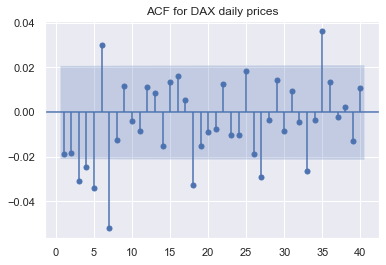

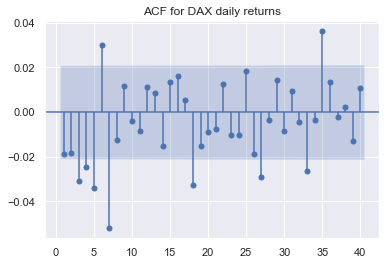

In [22]:
sgt.plot_acf(df_dax.dax_returns, zero = False, lags = 40)
plt.title('ACF for DAX daily prices')
sgt.plot_acf(df_dax.dax_returns, zero = False, lags = 40)
plt.title('ACF for DAX daily returns')
plt.show()

# Selecting the values of p and q using LLR and AIC Values.

Optimization terminated successfully.
         Current function value: 1.359443
         Iterations: 1
         Function evaluations: 81
                               SARIMAX Results                                
Dep. Variable:            dax_returns   No. Observations:                 8788
Model:               SARIMAX(5, 0, 1)   Log Likelihood              -11946.785
Date:                Fri, 05 Feb 2021   AIC                          23907.570
Time:                        01:34:24   BIC                          23957.138
Sample:                    01-08-1994   HQIC                         23924.456
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0099      0.187     -0.053      0.958      -0.376       

<ipython-input-23-6f401db9458f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dax['res_ar_5_ma_1'] = results_ar_5_ma_1.resid[1:]


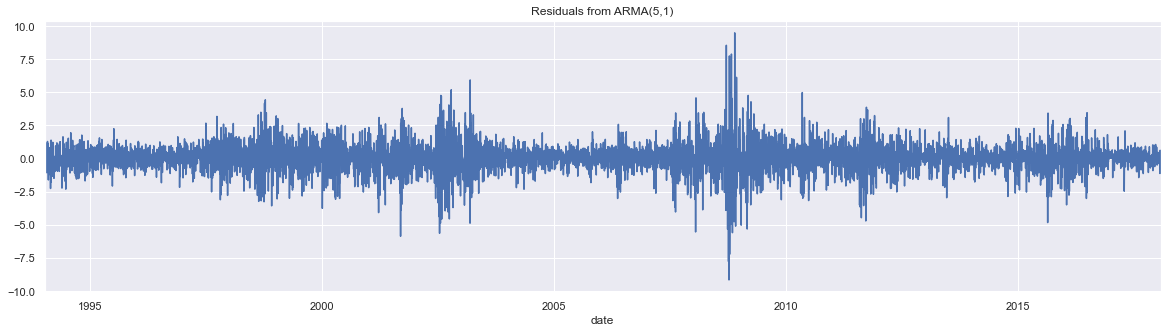

Optimization terminated successfully.
         Current function value: 1.357391
         Iterations: 2
         Function evaluations: 264
                               SARIMAX Results                                
Dep. Variable:            dax_returns   No. Observations:                 8788
Model:               SARIMAX(5, 0, 5)   Log Likelihood              -11928.751
Date:                Fri, 05 Feb 2021   AIC                          23879.502
Time:                        01:34:28   BIC                          23957.394
Sample:                    01-08-1994   HQIC                         23906.038
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7535      0.103     -7.332      0.000      -0.955      

<ipython-input-23-6f401db9458f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dax['res_ar_5_ma_5'] = results_ar_5_ma_5.resid[1:]


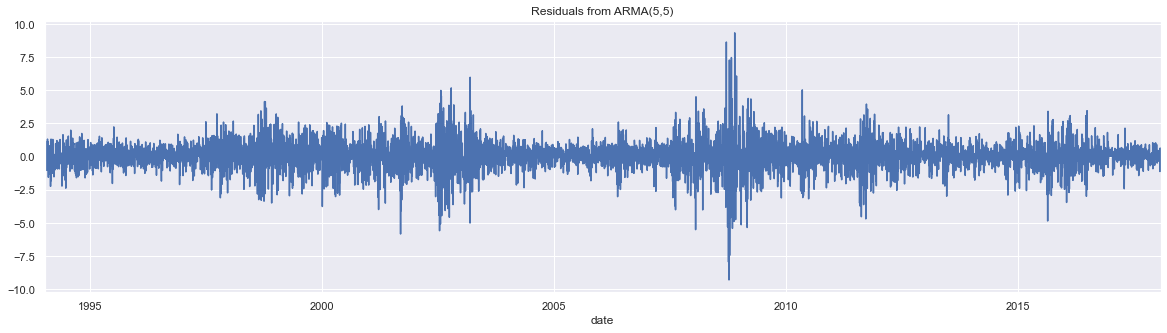

Optimization terminated successfully.
         Current function value: 1.359597
         Iterations: 2
         Function evaluations: 150
                               SARIMAX Results                                
Dep. Variable:            dax_returns   No. Observations:                 8788
Model:               SARIMAX(3, 0, 2)   Log Likelihood              -11948.139
Date:                Fri, 05 Feb 2021   AIC                          23908.278
Time:                        01:34:31   BIC                          23950.765
Sample:                    01-08-1994   HQIC                         23922.753
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6066      0.288      5.578      0.000       1.042      

<ipython-input-23-6f401db9458f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dax['res_ar_3_ma_2'] = results_ar_3_ma_2.resid[1:]


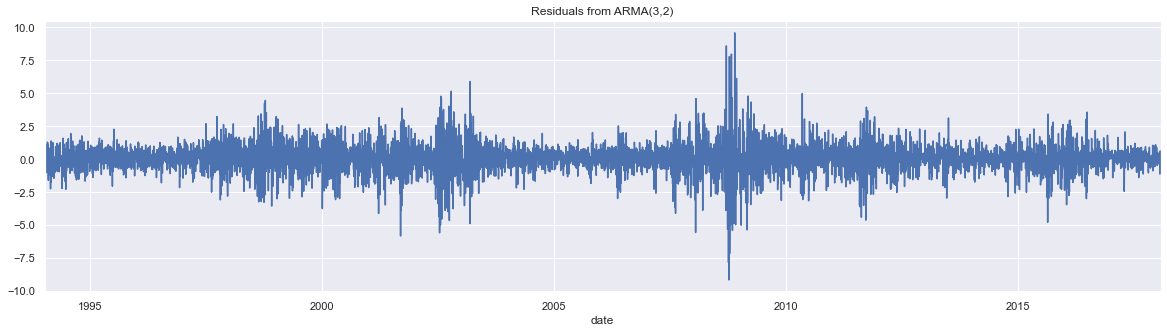

In [23]:
model_ar_5_ma_1 = SARIMAX(df_dax.dax_returns, order = (5,0,1))
results_ar_5_ma_1 = model_ar_5_ma_1.fit(maxiter=200, method = 'powell')
print(results_ar_5_ma_1.summary())
df_dax['res_ar_5_ma_1'] = results_ar_5_ma_1.resid[1:]
df_dax.res_ar_5_ma_1.plot(figsize = (20,5))
plt.title('Residuals from ARMA(5,1)')
plt.show()

# model_ar_1_ma_5 = ARMA(df_sap.spx_returns, order = (1,5))
# results_ar_1_ma_5 = model_ar_1_ma_5.fit()
# print(results_ar_1_ma_5.summary())
# df_sap['res_ar_1_ma_5'] = results_ar_1_ma_5.resid[1:]
# df_sap.res_ar_1_ma_5.plot(figsize = (20,5))
# plt.title('Residuals from ARMA(1,5)')
# plt.show()

model_ar_5_ma_5 = SARIMAX(df_dax.dax_returns, order = (5,0,5))
results_ar_5_ma_5 = model_ar_5_ma_5.fit(maxiter=200, method = 'powell')
print(results_ar_5_ma_5.summary())
df_dax['res_ar_5_ma_5'] = results_ar_5_ma_5.resid[1:]
df_dax.res_ar_5_ma_5.plot(figsize = (20,5))
plt.title('Residuals from ARMA(5,5)')
plt.show()

model_ar_3_ma_2 = SARIMAX(df_dax.dax_returns, order = (3,0,2))
results_ar_3_ma_2 = model_ar_3_ma_2.fit(maxiter=200, method = 'powell')
print(results_ar_3_ma_2.summary())
df_dax['res_ar_3_ma_2'] = results_ar_3_ma_2.resid[1:]
df_dax.res_ar_3_ma_2.plot(figsize = (20,5))
plt.title('Residuals from ARMA(3,2)')
plt.show()


In [24]:
print('\n ARMA(3,2)\t LL = ',results_ar_3_ma_2.llf, '\t AIC = ', results_ar_3_ma_2.aic)
print('\n ARMA(5,5)\t LL = ',results_ar_5_ma_5.llf, '\t AIC = ', results_ar_5_ma_5.aic)
# print('\n ARMA(1,5)\t LL = ',results_ar_1_ma_5.llf, '\t AIC = ', results_ar_1_ma_5.aic)
print('\n ARMA(5,1)\t LL = ',results_ar_5_ma_1.llf, '\t AIC = ', results_ar_5_ma_1.aic)



 ARMA(3,2)	 LL =  -11948.139233906093 	 AIC =  23908.278467812186

 ARMA(5,5)	 LL =  -11928.750938765757 	 AIC =  23879.501877531515

 ARMA(5,1)	 LL =  -11946.784783265253 	 AIC =  23907.569566530507


                               SARIMAX Results                                
Dep. Variable:            dax_returns   No. Observations:                 8788
Model:               SARIMAX(5, 0, 1)   Log Likelihood              -11939.937
Date:                Fri, 05 Feb 2021   AIC                          23893.873
Time:                        01:35:34   BIC                          23943.441
Sample:                    01-08-1994   HQIC                         23910.760
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6191      0.077     -8.012      0.000      -0.771      -0.468
ar.L2         -0.0330      0.007     -4.473      0.000      -0.047      -0.019
ar.L3         -0.0444      0.007     -6.077      0.0

<ipython-input-27-0fff0f34a9fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dax['res_ar_5_ma_1'] = results_ar_5_ma_1.resid[1:]


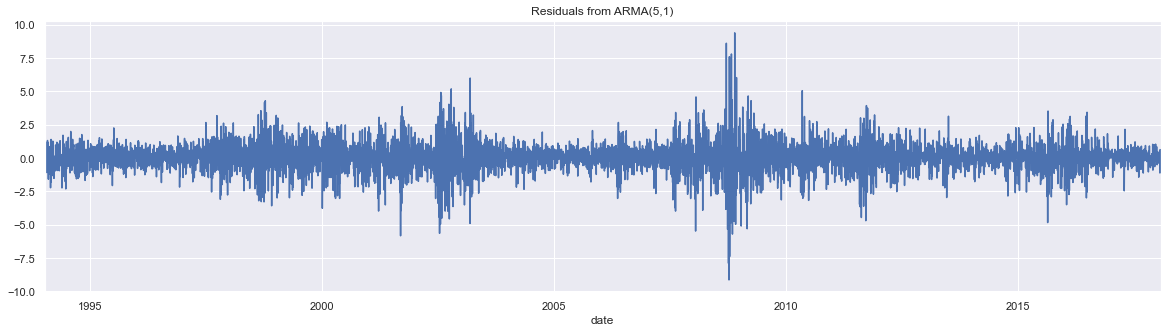

In [27]:
model_ar_5_ma_1 = SARIMAX(df_dax.dax_returns, order = (5,0,1))
results_ar_5_ma_1 = model_ar_5_ma_1.fit()
print(results_ar_5_ma_1.summary())
df_dax['res_ar_5_ma_1'] = results_ar_5_ma_1.resid[1:]
df_dax.res_ar_5_ma_1.plot(figsize = (20,5))
plt.title('Residuals from ARMA(5,1)')
plt.show()

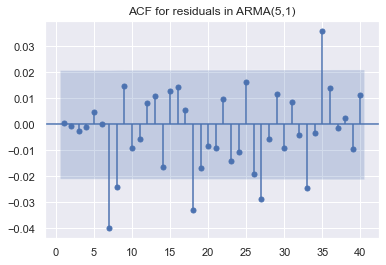

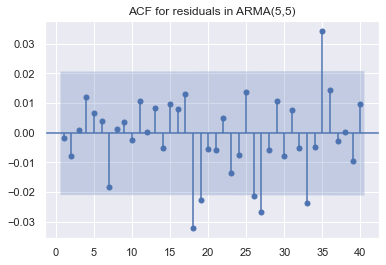

In [28]:
sgt.plot_acf(df_dax.res_ar_5_ma_1[1:], zero = False, lags = 40)
plt.title('ACF for residuals in ARMA(5,1)')
plt.show()
sgt.plot_acf(df_dax.res_ar_5_ma_5[1:], zero = False, lags = 40)
plt.title('ACF for residuals in ARMA(5,5)')
plt.show()

# Final Model: ARMA(5,1)